In [137]:
import numpy as np
import pandas as pd
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from matplotlib import pyplot as plt

In [138]:
data = pd.read_csv('task_b.csv')
data=data.iloc[:,1:]

In [139]:
data.head()

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


In [140]:
# How Features are correlated with output/predicted/target variable

data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [141]:
data.corr()

,f1,f2,f3,y
f1,1.000000,0.065468,0.123589,0.067172
f2,0.065468,1.000000,-0.055561,-0.017944
f3,0.123589,-0.055561,1.000000,0.839060
y,0.067172,-0.017944,0.839060,1.000000


In [142]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [143]:
X=data[['f1','f2','f3']].values
Y=data['y'].values
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


# What if our features are with different variance 

<pre>
* <b>As part of this task you will observe how linear models work in case of data having feautres with different variance</b>
* <b>from the output of the above cells you can observe that var(F2)>>var(F1)>>Var(F3)</b>

> <b>Task1</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

> <b>Task2</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

</pre>

<h3><font color='blue'> Make sure you write the observations for each task, why a particular feautre got more importance than others</font></h3>

In [144]:
np.unique(Y)

array([0., 1.])

As there are 2 unique values in Y, so coef_ will return (1, d)

In [145]:
def get_features(lossType, X, Y):
    '''
        Apply the Classification Training on entire data (ie considering all data as Train Data)
    '''
    n_iter = np.ceil(10**6 / len(Y))
    classifier = SGDClassifier(loss=lossType, max_iter=n_iter)
    classifier.fit(X, Y)
    print('# Loss: {} iterations -> {}'.format(lossType, classifier.n_iter_))
    return classifier.coef_[0]
    
    
def plot_features(f): 
    tx = np.argsort(f)
    x = [*range(len(f))]
    print('Feature Sorted', tx)
    y = sorted(f)
    print('Weights ', y)
    plt.bar(x, y, width=0.2)
    plt.xticks(x, tx)
    plt.xlabel('Features')
    plt.ylabel('Weights')
    plt.show()

### Task 1 (No PreProcessing)

In [146]:
from sklearn.linear_model import SGDClassifier

In [147]:
'''
Training donee on Entire Data (as For now purpose is to check the Feature Importance & Variance Relation, 
not much considering the Innference for New/Real Data
'''
# Logistic Regression
logreg_w = get_features('log', X, Y)

# SVM (Linear)
svm_w = get_features('hinge', X, Y)

# ref :- https://machinelearningmastery.com/calculate-feature-importance-with-python/
# summarize feature importance
print('\nLogistic Regression --- ')

for i,v in enumerate(logreg_w, start=1):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
print('\nSVM --- ')
for i,v in enumerate(svm_w, start=1):
	print('Feature: %0d, Score: %.5f' % (i,v))

# Loss: log iterations -> 41
# Loss: hinge iterations -> 47

Logistic Regression --- 
Feature: 1, Score: 8859.92695
Feature: 2, Score: -19555.08501
Feature: 3, Score: 10590.62774

SVM --- 
Feature: 1, Score: 3171.42370
Feature: 2, Score: 13486.37360
Feature: 3, Score: 10974.01709


Feature Sorted [1 0 2]
Weights  [-19555.08500652657, 8859.926947677297, 10590.627741140375]


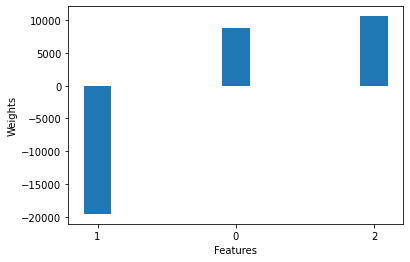

In [148]:
# plot feature importance (Logistic Regression)
plot_features(logreg_w)

Feature Sorted [0 2 1]
Weights  [3171.4237025134466, 10974.01708537361, 13486.373597756816]


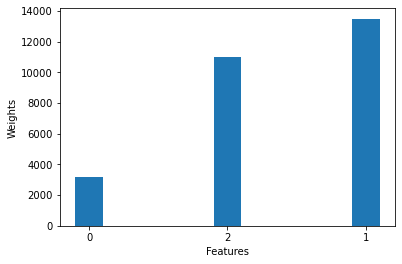

In [149]:
# plot feature importance (SVM)
plot_features(svm_w)

### Task 2 (With PreProcessing)

In [150]:
'''
Training done on Entire Data (as For now purpose is to check the Feature Importance & Variance Relation, 
not much considering the Innference for New/Real Data
'''
scaler = StandardScaler()
nX = scaler.fit_transform(X)

# Logistic Regression
logreg_w = get_features('log', nX, Y)

# SVM (Linear)
svm_w = get_features('hinge', nX, Y)

# ref :- https://machinelearningmastery.com/calculate-feature-importance-with-python/
# summarize feature importance
print('\nLogistic Regression --- ')

for i,v in enumerate(logreg_w, start=1):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
print('\nSVM --- ')
for i,v in enumerate(svm_w, start=1):
	print('Feature: %0d, Score: %.5f' % (i,v))

# Loss: log iterations -> 23
# Loss: hinge iterations -> 22

Logistic Regression --- 
Feature: 1, Score: -0.59557
Feature: 2, Score: 1.36610
Feature: 3, Score: 12.09715

SVM --- 
Feature: 1, Score: -2.35810
Feature: 2, Score: -1.35696
Feature: 3, Score: 16.38142


Feature Sorted [0 1 2]
Weights  [-0.5955690041881007, 1.366104887807503, 12.097146890456353]


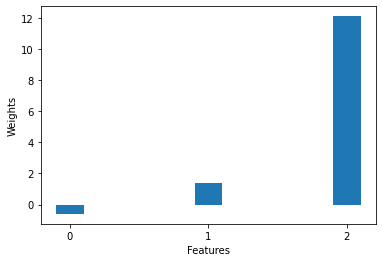

In [151]:
# plot feature importance (Logistic Regression)
plot_features(logreg_w)

Feature Sorted [0 1 2]
Weights  [-2.358102777606078, -1.356958474926635, 16.381424099010967]


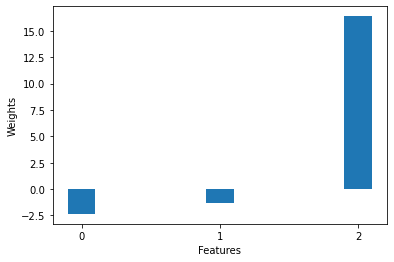

In [152]:
# plot feature importance (SVM)
plot_features(svm_w)

### Observations 

- When Features are Pre-Processed (ie Standardised) generally it tooks less iteration to converge for weights
- The weight difference between 2 Models is less in case of Standardised Features compare to Non-PreProcessed Features